# Tutorial 06 (Programming and Mathematics for AI)



In **Lab 6_3** we will implement NN class 


## Recap: 

## Basic artificial neural network structure

You can see a  basic neural network structure in the following diagram. We have an input layer with three nodes $i_{1}$, $i_{2}$, $i_{3}$. These nodes get the corresponding input values $x_{1}$, $x_{2}$, $x_{3}$. The middle or hidden layer has four nodes $h_{1}$, $h_{2}$, $h_{3}$, $h_{4}$. The input of this layer stems from the input layer. We will discuss the mechanism soon. Finally, our output layer consists of the two nodes $o_{1}$, $o_{2}$.
We have to note that some would call this a two layer network, because they don't count the inputs as a layer.

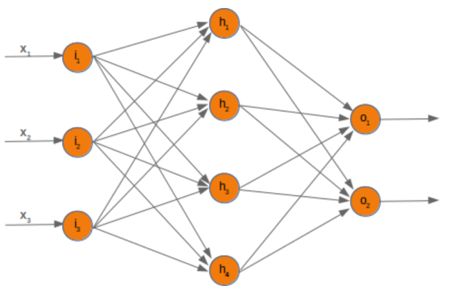

The input layer consists of the nodes $i_{1}$, $i_{2}$, $i_{3}$. In principle the input is a one-dimensional vector, like (2, 4, 11). A one-dimensional vector is represented in numpy like this:

In the algorithm, which we will write later, we will have to transpose it into a column vector, i.e. a two-dimensional array with just one column:

## Weights and matrices

Each of the arrows in our network diagram has an associated weight value. We will only look at the arrows between the input and the output layer now.

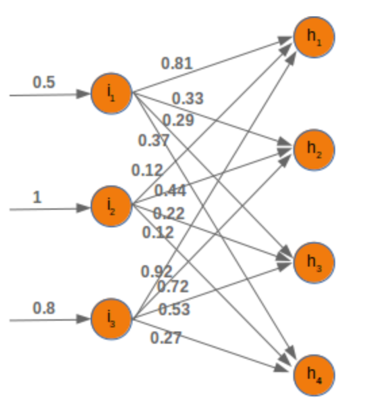

The value $x_{1}$ going into the node $i_{1}$ will be distributed according to the values of the weights. In the following diagram we have added some example values. Using these values, the input values $Ih_{1}$, $Ih_{2}$, $Ih_{3}$, $Ih_{4}$ into the nodes ($h_{1}$, $h_{2}$, $h_{3}$, $h_{4}$) of the hidden layer can be calculated like this:



$Ih_{1}$=0.81∗0.5+0.12∗1+0.92∗0.8 

$Ih_{2}$=0.33∗0.5+0.44∗1+0.72∗0.8

$Ih_{3}$=0.29∗0.5+0.22∗1+0.53∗0.8

$Ih_{4}$=0.37∗0.5+0.12∗1+0.27∗0.8


You are already familiar with matrices and matrix multiplication. We will redraw our network and denote the weights with $w_{ij}$:

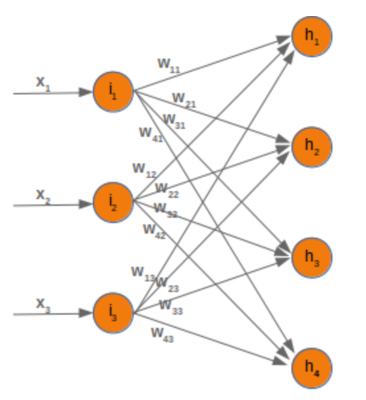

In order to efficiently execute all the necessary calaculations, we will arrange the weights into a weight matrix. The weights in our diagram above build an array, which we will call **'weights_in_hidden'** in our Neural Network class. The name should indicate that the weights are connecting the input and the hidden nodes, i.e. they are between the input and the hidden layer. We will also abbreviate the name as **'wih'**. The weight matrix between the hidden and the output layer will be denoted as **"who"**:

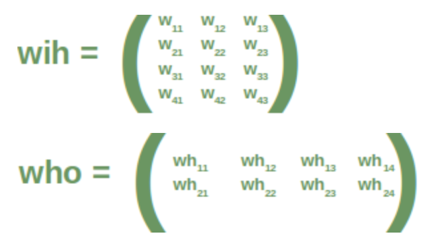

Now that we have defined our weight matrices, we have to take the next step. We have to multiply the matrix wih the input vector.

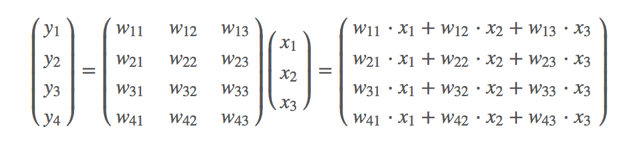

We have a similar situation for the 'who' matrix between hidden and output layer. So the output $z_{1}$ and $z_{2}$ from the nodes $o_{1}$ and $o_{2}$, can also be calculated with matrix multiplications:

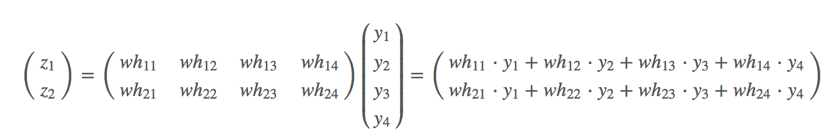

You might have noticed that something is missing in our previous calculations. We have to apply an activation or step function Φ on each of these sums.

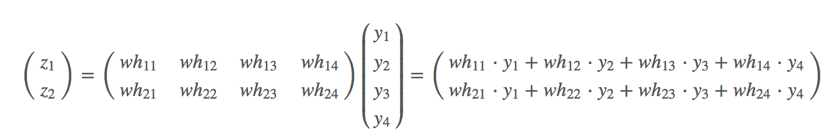The following picture depicts the whole flow of calculation, i.e. the matrix multiplication and the succeeding multiplication.

The matrix multiplication between the matrix wih and the matrix of the values of the input nodes $x_{1}$, $x_{2}$, $x_{3}$ calculates the output which will be passed to the activation function.

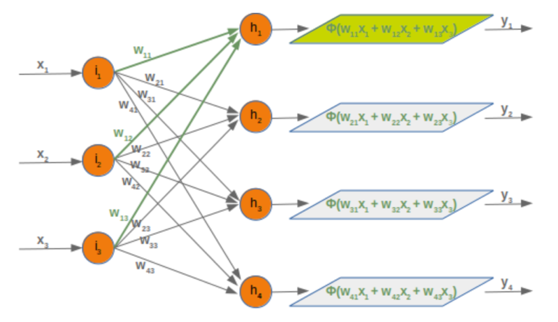

The final output $y_{1}$, $y_{2}$, $y_{3}$, $y_{4}$ is the input of the weight matrix who:

Even though treatment is completely analogue, we will also have a detailled look at what is going on between our hidden layer and the output layer:

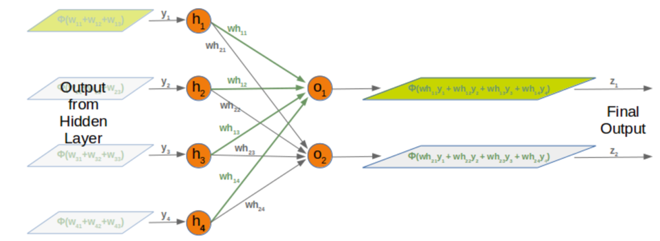

## Implementation 

[[-0.11974399  0.32425491 -0.09937991  0.05712914]
 [ 0.22066208  0.02315098 -0.34613281  0.27855788]
 [ 0.03314403  0.12913871  0.03855866 -0.42351124]]


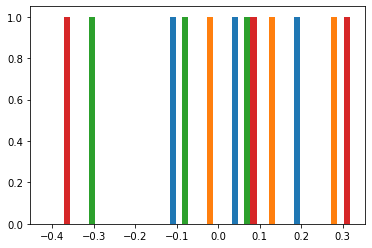

In [1]:
from scipy.stats import truncnorm
import numpy as np 
import matplotlib.pyplot as plt 


def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=1, low=-0.5, upp=0.5)
w1 = X.rvs((3,4))

print(w1)
plt.hist(w1)
plt.show()

## Neural Network Class

We have implemented first NN. Now we will write a N class. It wil contain initializations, train and run methods. 



In [1]:
from scipy.special import expit as activation_function

In [2]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

@np.vectorize
def d_sigmoid(x):
    return x * (1.0 - x)


activation_function = sigmoid
activation_derivative = d_sigmoid

from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 0.5 
        X = truncated_normal(mean=1, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 0.5 
        X = truncated_normal(mean=1, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        
    
    def train(self, input_vector, target_vector,epochs=100):
        # input_vector and target_vector can be tuple, list or ndarray
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
    
        for i in range(epochs):
        
            # forward pass
            output_vector1 = np.dot(self.weights_in_hidden, input_vector)
            output_vector_hidden = activation_function(output_vector1)

            output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
            output_vector_network = activation_function(output_vector2)
            
            # derivative of the loss
            output_errors = ...
            # derivative of the activation function
            derivative_output = ...
            
            tmp = ...   
            # multiply with the previous activation (output_vector_hidden)
            who_update = self.learning_rate * np.dot(tmp, output_vector_hidden.T)

            # calculate hidden errors:
            hidden_errors = np.dot(self.weights_hidden_out.T, output_errors * derivative_output )

            derivative_hidden = ...  
            tmp = ...
            wih_update = ...

            # update the weights:
            self.weights_in_hidden += wih_update
            self.weights_hidden_out += ...


    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = ...
        output_vector = ...
        
        output_vector = ...
        output_vector = ...
        
        return output_vector.T

We will test our network with our created example: 

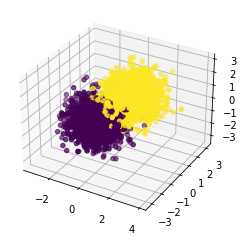

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X, y = make_blobs( n_samples=5000, n_features=3, centers=((1, 1,1), (5, 5,5)), cluster_std = 2)

X = StandardScaler().fit_transform(X)
ax = plt.subplot(projection='3d')
ax.scatter3D( X[:,0], X[:,1], X[:,2], c=y)

y = np.reshape(y,(-1,1))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [5]:
simple_network = NeuralNetwork(no_of_in_nodes=3, 
                               no_of_out_nodes=1, 
                               no_of_hidden_nodes=4,
                               learning_rate=0.01)
simple_network.train(X_train,y_train)

y_hat = simple_network.run(X_test)

y_hat[y_hat >0.5]=1
y_hat[y_hat<0.5] =0
print(sum(y_hat==y_test)/len(y_hat))


[0.958]


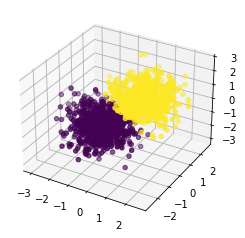

In [6]:
ax = plt.subplot(projection='3d')
ax.scatter3D( X_test[:,0], X_test[:,1], X_test[:,2], c=y_hat)

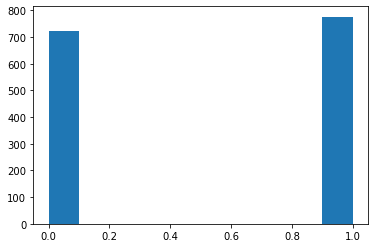

In [6]:
plt.hist(y_hat)
plt.show()

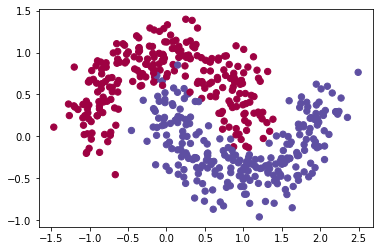

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(500, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

y = np.reshape(y,(-1,1))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=1, 
                               no_of_hidden_nodes=3,
                               learning_rate=0.01)
simple_network.train(X_train,y_train)

y_hat = simple_network.run(X_test)

y_hat[y_hat >0.5]=1
y_hat[y_hat<0.5] =0
sum(y_hat==y_test)/len(y_hat)

array([0.78])

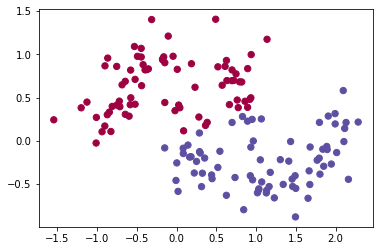

In [9]:

plt.scatter(X_test[:,0], X_test[:,1], s=40, c=y_hat, cmap=plt.cm.Spectral)



# Exercise 

- Go through the code of both notebooks. 
- Create your own class of neural network. 
- You can get inspiration from the code. The class will be helful for your coursework. 